In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Flatten
from tqdm import tqdm
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv('Dasatest_N.csv')
df['Month'] = pd.to_datetime(df.Month , format = '%d-%m-%Y')
data = df.drop(['Month'], axis=1)
data.index = df.Month
cols = data.columns

In [4]:
pred = np.zeros([15,3915])

In [5]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [6]:
def data_input(train,n_steps,n_features):
    # define input sequence
    timeseries_data = train
    # choose a number of time steps
    n_steps = n_steps
    # split into samples
    X, y = prepare_data(timeseries_data, n_steps)
#     print(X,y)
#     print(X.shape)
    n_features = n_features
    X = X.reshape((X.shape[0], X.shape[1], n_features))
#     print(X.shape) 
    return np.array(X),np.array(y)   

In [106]:
def model_create(X, y,n_steps,n_features):
    model = Sequential()
    model.add(LSTM(20, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(8, activation='relu'))
    model.add(Dense(1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=500,
    decay_rate=0.9)
    opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model.compile(loss='mape', optimizer=opt)
#     model.compile(optimizer='Adam', loss='mape')
    # fit model
    history = model.fit(X, y, epochs=1000, verbose=1)
    plot1 = plt.plot(history.history['loss'],"r")
    plt.show(plot1)
    return model

In [107]:
scaler = MinMaxScaler()

In [108]:
def model_predict(X_input,n_steps,n_steps_out):   
    x_input = X_input
    print(x_input)
    temp_input = list(x_input)
    print(len(temp_input))
    lst_output=[]
    i = 0
    while(i < n_steps_out):
        
        if(len(temp_input)>n_steps):
            x_input=np.array(temp_input[1:])
#             print("{} day input {}".format(i,x_input))
            #print(x_input)
            x_input = x_input.reshape((1, n_steps, n_features))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
#             print("{} day output {}".format(i,yhat))
            temp_input.append(yhat[0][0])
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.append(yhat[0][0])
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.append(yhat[0][0])
            lst_output.append(yhat[0][0])
            i=i+1

    print(lst_output)
    return(np.array(lst_output))

In [109]:
def plot_graph(X,pred):
    time = np.arange(87)
    plt.plot(time[:72],X)
    plt.plot(time[-28:],pred)
    plt.show()

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Epoch 1/1000
2/2 [==============================] - 2s 8ms/step - loss: 93.8467
Epoch 2/1000
2/2 [==============================] - 0s 8ms/step - loss: 68.7586
Epoch 3/1000
2/2 [==============================] - 0s 8ms/step - loss: 58.1656
Epoch 4/1000
2/2 [==============================] - 0s 8ms/step - loss: 54.1068
Epoch 5/1000
2/2 [==============================] - 0s 7ms/step - loss: 54.6268
Epoch 6/1000
2/2 [==============================] - 0s 7ms/step - loss: 53.2377
Epoch 7/1000
2/2 [==============================] - 0s 7ms/step - loss: 51.6011
Epoch 8/1000
2/2 [==============================] - 0s 7ms/step - loss: 51.2344
Epoch 9/1000
2/2 [==============================] - 0s 7ms/step - loss: 49.9620
Epoch 10/1000
2/2 [==============================] - 0s 7ms/step - loss: 49.2411
Epoch 11/1000
2/2 [==============================] - 0s 7ms/step - loss: 47.6285
Epoch 12/1000
2/2 [==============================] - 0s 7ms/step - loss: 45.8249
Epoch 13/1000
2/2 [==================

2/2 [==============================] - 0s 7ms/step - loss: 32.4528
Epoch 203/1000
2/2 [==============================] - 0s 8ms/step - loss: 31.8006
Epoch 204/1000
2/2 [==============================] - 0s 8ms/step - loss: 32.7777
Epoch 205/1000
2/2 [==============================] - 0s 7ms/step - loss: 32.3810
Epoch 206/1000
2/2 [==============================] - 0s 7ms/step - loss: 32.0221
Epoch 207/1000
2/2 [==============================] - 0s 7ms/step - loss: 31.8548
Epoch 208/1000
2/2 [==============================] - 0s 7ms/step - loss: 31.9491
Epoch 209/1000
2/2 [==============================] - 0s 7ms/step - loss: 31.9176
Epoch 210/1000
2/2 [==============================] - 0s 7ms/step - loss: 31.4625
Epoch 211/1000
2/2 [==============================] - 0s 7ms/step - loss: 32.2870
Epoch 212/1000
2/2 [==============================] - 0s 6ms/step - loss: 32.0920
Epoch 213/1000
2/2 [==============================] - 0s 8ms/step - loss: 32.2856
Epoch 214/1000
2/2 [===========

2/2 [==============================] - 0s 6ms/step - loss: 31.4746
Epoch 303/1000
2/2 [==============================] - 0s 7ms/step - loss: 31.6923
Epoch 304/1000
2/2 [==============================] - 0s 7ms/step - loss: 31.4654
Epoch 305/1000
2/2 [==============================] - 0s 7ms/step - loss: 31.9645
Epoch 306/1000
2/2 [==============================] - 0s 7ms/step - loss: 30.9319
Epoch 307/1000
2/2 [==============================] - 0s 8ms/step - loss: 30.9643
Epoch 308/1000
2/2 [==============================] - 0s 9ms/step - loss: 30.9716
Epoch 309/1000
2/2 [==============================] - 0s 7ms/step - loss: 30.7582
Epoch 310/1000
2/2 [==============================] - 0s 8ms/step - loss: 30.7998
Epoch 311/1000
2/2 [==============================] - 0s 8ms/step - loss: 30.4775
Epoch 312/1000
2/2 [==============================] - 0s 7ms/step - loss: 30.8277
Epoch 313/1000
2/2 [==============================] - 0s 7ms/step - loss: 30.9276
Epoch 314/1000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 28.2292
Epoch 403/1000
2/2 [==============================] - 0s 8ms/step - loss: 31.6441
Epoch 404/1000
2/2 [==============================] - 0s 7ms/step - loss: 28.2267
Epoch 405/1000
2/2 [==============================] - 0s 8ms/step - loss: 30.2062
Epoch 406/1000
2/2 [==============================] - 0s 8ms/step - loss: 27.8834
Epoch 407/1000
2/2 [==============================] - 0s 8ms/step - loss: 32.7810
Epoch 408/1000
2/2 [==============================] - 0s 8ms/step - loss: 29.2344
Epoch 409/1000
2/2 [==============================] - 0s 7ms/step - loss: 29.4935
Epoch 410/1000
2/2 [==============================] - 0s 7ms/step - loss: 30.4470
Epoch 411/1000
2/2 [==============================] - 0s 7ms/step - loss: 26.5751
Epoch 412/1000
2/2 [==============================] - 0s 7ms/step - loss: 30.1398
Epoch 413/1000
2/2 [==============================] - 0s 7ms/step - loss: 29.3463
Epoch 414/1000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 23.9011
Epoch 503/1000
2/2 [==============================] - 0s 7ms/step - loss: 22.7293
Epoch 504/1000
2/2 [==============================] - 0s 7ms/step - loss: 24.3146
Epoch 505/1000
2/2 [==============================] - 0s 7ms/step - loss: 24.0787
Epoch 506/1000
2/2 [==============================] - 0s 7ms/step - loss: 22.2812
Epoch 507/1000
2/2 [==============================] - 0s 7ms/step - loss: 24.6246
Epoch 508/1000
2/2 [==============================] - 0s 7ms/step - loss: 22.7294
Epoch 509/1000
2/2 [==============================] - 0s 6ms/step - loss: 23.0194
Epoch 510/1000
2/2 [==============================] - 0s 7ms/step - loss: 23.1437
Epoch 511/1000
2/2 [==============================] - 0s 7ms/step - loss: 22.1516
Epoch 512/1000
2/2 [==============================] - 0s 7ms/step - loss: 22.6010
Epoch 513/1000
2/2 [==============================] - 0s 8ms/step - loss: 22.2289
Epoch 514/1000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 22.2600
Epoch 603/1000
2/2 [==============================] - 0s 7ms/step - loss: 20.5700
Epoch 604/1000
2/2 [==============================] - 0s 7ms/step - loss: 20.0387
Epoch 605/1000
2/2 [==============================] - 0s 7ms/step - loss: 20.3935
Epoch 606/1000
2/2 [==============================] - 0s 8ms/step - loss: 20.0274
Epoch 607/1000
2/2 [==============================] - 0s 7ms/step - loss: 20.3878
Epoch 608/1000
2/2 [==============================] - 0s 7ms/step - loss: 20.0138
Epoch 609/1000
2/2 [==============================] - 0s 7ms/step - loss: 19.2320
Epoch 610/1000
2/2 [==============================] - 0s 7ms/step - loss: 21.3511
Epoch 611/1000
2/2 [==============================] - 0s 8ms/step - loss: 20.9269
Epoch 612/1000
2/2 [==============================] - 0s 7ms/step - loss: 22.1725
Epoch 613/1000
2/2 [==============================] - 0s 7ms/step - loss: 21.7450
Epoch 614/1000
2/2 [===========

2/2 [==============================] - 0s 6ms/step - loss: 22.1925
Epoch 703/1000
2/2 [==============================] - 0s 7ms/step - loss: 21.7352
Epoch 704/1000
2/2 [==============================] - 0s 7ms/step - loss: 20.3030
Epoch 705/1000
2/2 [==============================] - 0s 6ms/step - loss: 21.1846
Epoch 706/1000
2/2 [==============================] - 0s 7ms/step - loss: 20.8984
Epoch 707/1000
2/2 [==============================] - 0s 8ms/step - loss: 19.7527
Epoch 708/1000
2/2 [==============================] - 0s 7ms/step - loss: 19.6680
Epoch 709/1000
2/2 [==============================] - 0s 7ms/step - loss: 19.4586
Epoch 710/1000
2/2 [==============================] - 0s 7ms/step - loss: 19.3980
Epoch 711/1000
2/2 [==============================] - 0s 8ms/step - loss: 18.8079
Epoch 712/1000
2/2 [==============================] - 0s 8ms/step - loss: 21.1521
Epoch 713/1000
2/2 [==============================] - 0s 9ms/step - loss: 19.8730
Epoch 714/1000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 19.2410
Epoch 803/1000
2/2 [==============================] - 0s 7ms/step - loss: 17.7103
Epoch 804/1000
2/2 [==============================] - 0s 7ms/step - loss: 18.0986
Epoch 805/1000
2/2 [==============================] - 0s 7ms/step - loss: 17.7712
Epoch 806/1000
2/2 [==============================] - 0s 7ms/step - loss: 17.6801
Epoch 807/1000
2/2 [==============================] - 0s 7ms/step - loss: 18.1726
Epoch 808/1000
2/2 [==============================] - 0s 7ms/step - loss: 17.6552
Epoch 809/1000
2/2 [==============================] - 0s 8ms/step - loss: 17.7218
Epoch 810/1000
2/2 [==============================] - 0s 7ms/step - loss: 17.7775
Epoch 811/1000
2/2 [==============================] - 0s 8ms/step - loss: 17.4948
Epoch 812/1000
2/2 [==============================] - 0s 8ms/step - loss: 17.4850
Epoch 813/1000
2/2 [==============================] - 0s 8ms/step - loss: 16.7106
Epoch 814/1000
2/2 [===========

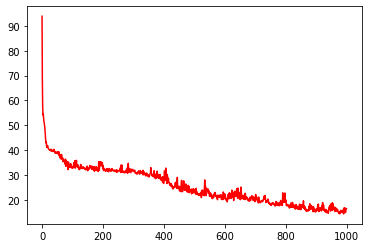

[0.6151757  0.53172216 0.70521265 0.73138362 0.76560343 0.67696219
 0.68338059 0.72837025 0.56817341 0.72323253 0.77148206 0.70492301]
[0.6151757  0.53172216 0.70521265 0.73138362 0.76560343 0.67696219
 0.68338059 0.72837025 0.56817341 0.72323253 0.77148206 0.70492301]
12
[0.5325756]
[0.5325756, 0.5589278, 0.6219452, 0.65069115, 0.5932247, 0.54627866, 0.5525182, 0.49718198, 0.50913703, 0.5411805, 0.49768856, 0.37260082, 0.30360842, 0.31605318, 0.311809, 0.25204256, 0.18180583, 0.14528711, 0.10333887, 0.11201048, 0.12952472, 0.16925506, 0.23039152, 0.73631936, 0.84855425, 0.667687, 0.32958403, 0.16756032]


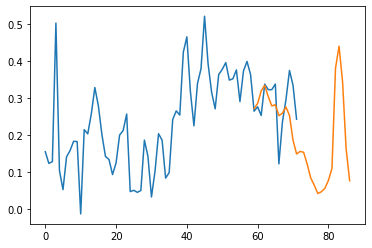

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:19<00:00, 19.43s/it]

0.25512815641483394


In [110]:
for i in tqdm(range(3915)):
    data_total = np.array(data.iloc[:,i])
    train = data_total[:60].reshape(-1,1)
    valid = data_total[60:]
    scaler = scaler.fit(train)
    train_scaled = scaler.transform(train)
    n_steps = 12
    n_features = 1
    X,y = data_input(train_scaled,n_steps,n_features)
    model = model_create(X, y,n_steps,n_features)
    X_input = X[-1].reshape((n_steps))
    print(X_input)
    n_steps_out = 28
    pred_scaled = model_predict(X_input,n_steps,n_steps_out)
    pred = scaler.inverse_transform(pred_scaled.reshape(-1,1))
    pred = np.array(pred)
    plot_graph(data_total,pred)
    print(mean_absolute_percentage_error(valid,pred[1:13]))
    